In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random

#TensorFlow - Importing the Libraries
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the Data
# training directory - should have sub directories named after each label
DATADIR = "C:\\Users\\Higuchid\\Documents\\Python Scripts\\TensorFlow CNN\\data\\TRAIN" 
TESTDIR = "C:\\Users\\Higuchid\\Documents\\Python Scripts\\TensorFlow CNN\\data\\TEST" # test directory
LABELS = ["Class 1", "Class 2", "Class 3", "Class 6", "Class 7", "Class 8"] # should be filled with our determined labels

train_images_tf = []
train_labels_tf = np.empty(0)

# Shaping Input - change to match dimensions of processed images
IMG_LENGTH = 256
IMG_WIDTH = 256

# Where directory DATADIR contains directories for each category in LABELS
# i.e. our training set is already labelled
for category in LABELS:
    path = os.path.join(DATADIR, category)
    #print(path)
    class_num = LABELS.index(category)
    #print(class_num)
    for img in os.listdir(path):
        try:
            # Read in Image
            img_array = cv.imread(os.path.join(path, img))
            
            # Convert to GrayScale
            if len(img_array.shape) > 2:
                img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            
            # Randomly apply a sharpen to the image
            if random.random() > 0:
                kernel = np.array([[0,-1,0], 
                                   [-1,5,-1],
                                   [0,-1,0]])
                img_array = cv.filter2D(img_array, -1, kernel)
            
            # Resize Image
            img_array = cv.resize(img_array, (IMG_LENGTH, IMG_WIDTH))
            
            # Normalize the Image
            new_array = cv.normalize(img_array, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
            
            train_images_tf.append(new_array) 
            train_labels_tf = np.append(train_labels_tf, class_num)
        except Exception as e:
            pass

train_images_tf = np.array(train_images_tf).reshape(-1, IMG_LENGTH, IMG_WIDTH, 1)

In [3]:

# Building the Model - replace each Conv2D parameter as necessary to fit
#   amount of images we use to train, and other factors
# Change the input_shape parameter to have the dimensions of the image not 128
modeltf = keras.Sequential([
    keras.layers.Conv2D(input_shape=(IMG_LENGTH,IMG_WIDTH,1), filters=32, kernel_size=5, strides=2, padding="same", activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='softmax') # 2 should be replaced with number of labels, sigmoid while binary output
])


# Visualizing the Model
adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
modeltf.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
modeltf.summary()


# Training the Model

print("Training the model")
modeltf.fit(train_images_tf, train_labels_tf, epochs=90, batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          7

5/5 [==============================] - 4s 831ms/step - loss: 0.4250 - accuracy: 0.8903
Epoch 66/90
5/5 [==============================] - 4s 789ms/step - loss: 0.4080 - accuracy: 0.8968
Epoch 67/90
5/5 [==============================] - 4s 806ms/step - loss: 0.3937 - accuracy: 0.8935
Epoch 68/90
5/5 [==============================] - 4s 874ms/step - loss: 0.3847 - accuracy: 0.9000
Epoch 69/90
5/5 [==============================] - 4s 778ms/step - loss: 0.3778 - accuracy: 0.8968
Epoch 70/90
5/5 [==============================] - 4s 835ms/step - loss: 0.3805 - accuracy: 0.8806
Epoch 71/90
5/5 [==============================] - 4s 792ms/step - loss: 0.3526 - accuracy: 0.9194
Epoch 72/90
5/5 [==============================] - 4s 792ms/step - loss: 0.3470 - accuracy: 0.9097
Epoch 73/90
5/5 [==============================] - 4s 780ms/step - loss: 0.3337 - accuracy: 0.9258
Epoch 74/90
5/5 [==============================] - 4s 791ms/step - loss: 0.3106 - accuracy: 0.9226
Epoch 75/90
5/5 [=====

starting image process


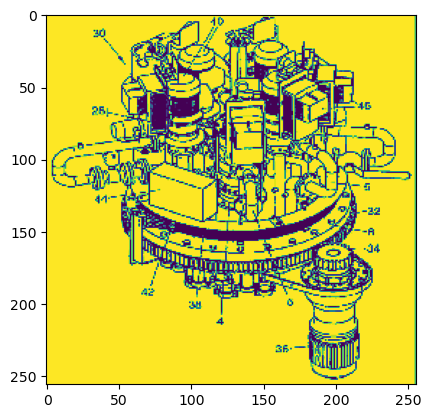

image: CA-2700186-REPRESENTATIVE_DRAWING-20220201-6-expected8.tif
[[5.37274862e-14 1.05898746e-03 1.12792705e-07 3.65432669e-07
  1.58547991e-05 9.98924673e-01]]
Class 8
starting image process


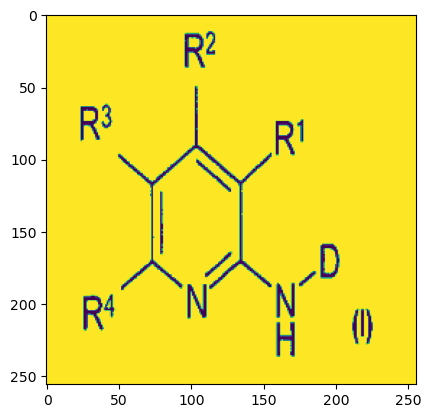

image: CA-2701806-REPRESENTATIVE_DRAWING-20220201-5-expected1.tif
[[7.5035030e-01 1.0247737e-02 5.2738506e-02 7.4236159e-04 1.8551867e-01
  4.0246209e-04]]
Class 1
starting image process


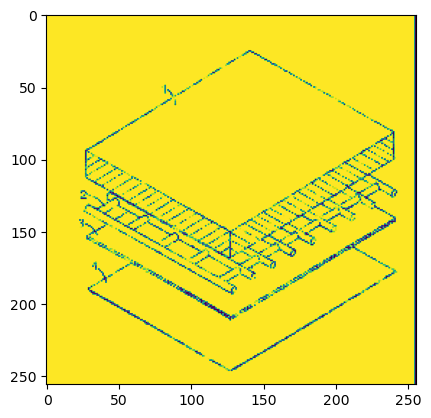

image: CA-2714099-REPRESENTATIVE_DRAWING-20220201-6-expected6.tif
[[3.4917633e-07 3.4440871e-02 1.0500417e-01 8.4320253e-01 5.9577590e-04
  1.6756231e-02]]
Class 6
starting image process


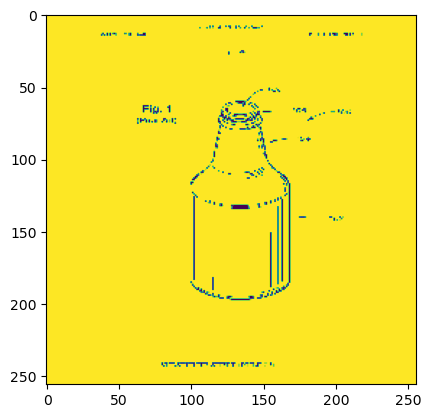

image: CA-2714105-DRAWINGS-20220201-4-expected7.tif
[[0.2121338  0.01034767 0.00291252 0.09833644 0.67504084 0.00122876]]
Class 7
starting image process


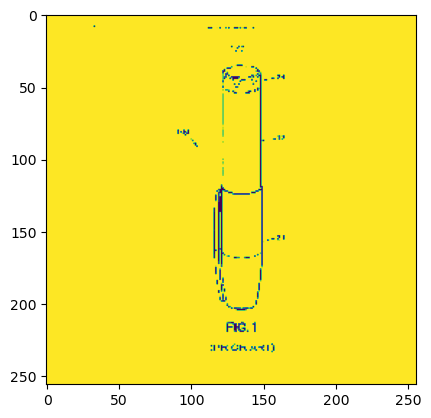

image: CA-2714261-DRAWINGS-20220201-4-expected7.tif
[[0.6356104  0.01408112 0.00103565 0.03682829 0.31176174 0.00068285]]
Class 1
starting image process


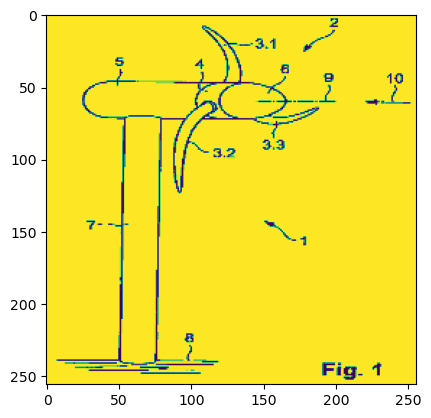

image: CA-2714289-REPRESENTATIVE_DRAWING-20220201-6-expected7.tif
[[9.9851233e-01 3.8389117e-06 6.6888360e-06 6.5768676e-05 1.3953196e-03
  1.6025790e-05]]
Class 1
starting image process


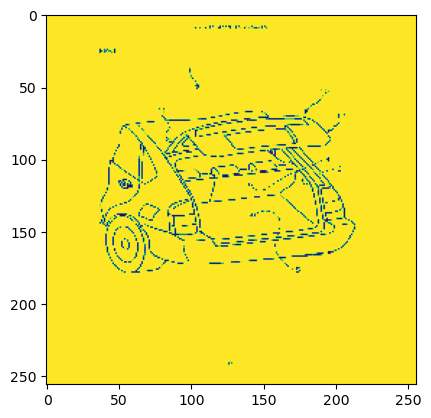

image: CA-2714655-DRAWINGS-20220201-4-expected8.tif
[[0.00606912 0.14876503 0.04752324 0.5516212  0.03883959 0.20718189]]
Class 6
starting image process


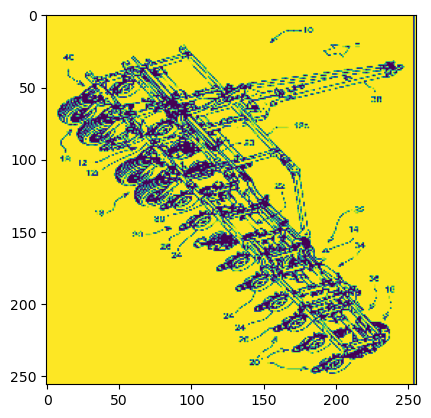

image: CA-2714767-REPRESENTATIVE_DRAWING-20220201-1-expected8.tif
[[1.3557756e-11 7.9210027e-04 9.9877679e-09 2.4173903e-07 5.3349725e-04
  9.9867415e-01]]
Class 8
starting image process


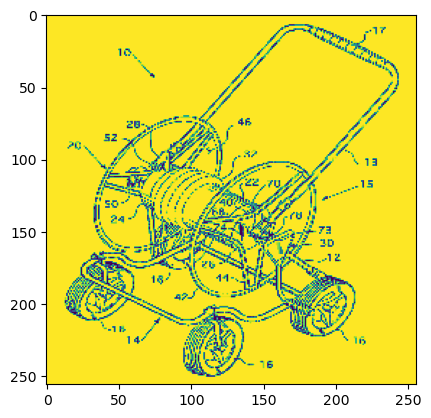

image: CA-2714837-REPRESENTATIVE_DRAWING-20220201-6-expected8.tif
[[1.1907505e-09 1.3481275e-02 1.5651891e-03 2.2776550e-01 1.0377768e-03
  7.5615025e-01]]
Class 8
starting image process


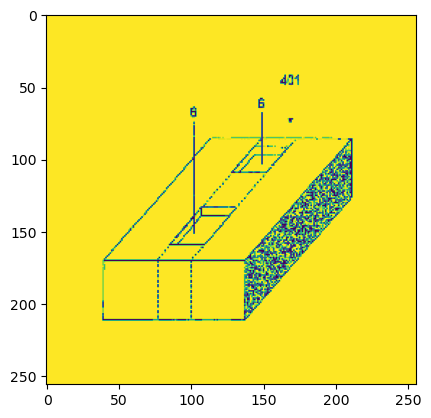

image: CA-2728468-REPRESENTATIVE_DRAWING-20220201-6-expected6.tif
[[2.4027725e-06 1.5886888e-04 9.0876734e-04 9.9385190e-01 1.3647496e-03
  3.7133351e-03]]
Class 6
starting image process


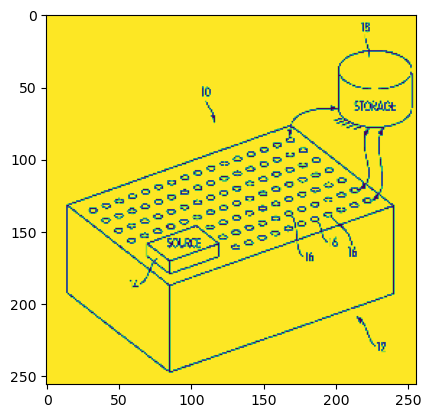

image: CA-2728812-REPRESENTATIVE_DRAWING-20220201-6-expected6.tif
[[1.2525388e-06 3.9318148e-02 4.2194506e-04 1.1171974e-01 2.4034198e-02
  8.2450467e-01]]
Class 8
starting image process


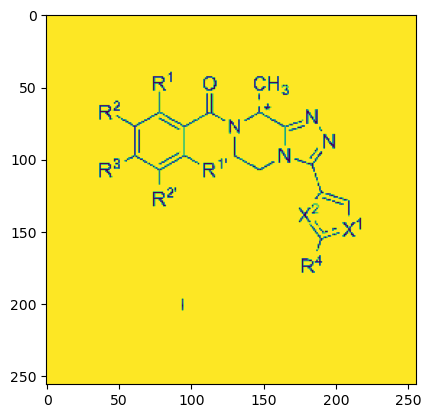

image: CA-2907814-REPRESENTATIVE_DRAWING-20220207-5-expected1.tif
[[3.85179847e-01 3.49514885e-03 1.16961814e-01 4.94215786e-01
  1.14367976e-04 3.30015209e-05]]
Class 6
starting image process


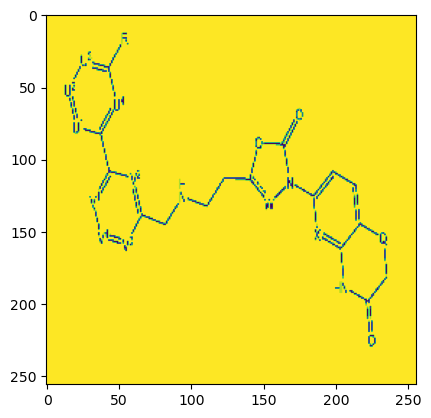

image: CA-2907832-REPRESENTATIVE_DRAWING-20220207-4-expected1.tif
[[8.8797319e-01 3.6945481e-02 7.4692413e-02 3.7448524e-05 1.0982230e-04
  2.4169675e-04]]
Class 1
starting image process


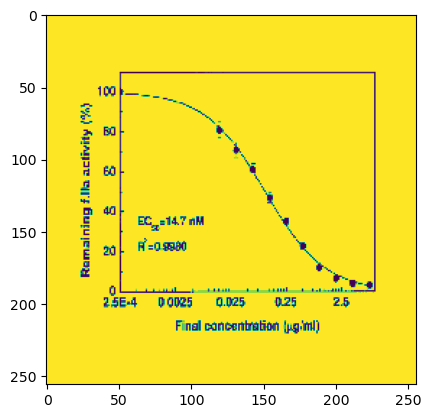

image: CA-2907887-REPRESENTATIVE_DRAWING-20220207-5-expected3.tif
[[2.8665228e-02 2.0483773e-02 9.4916058e-01 1.0150002e-03 5.4033275e-04
  1.3515672e-04]]
Class 3
starting image process


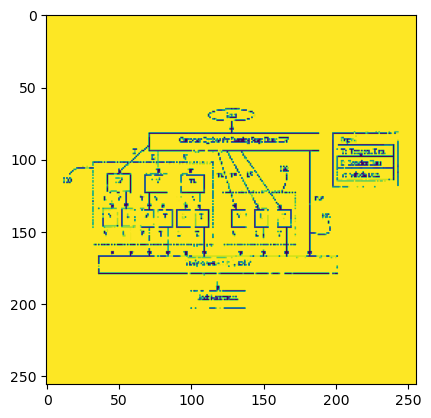

image: CA-2907901-REPRESENTATIVE_DRAWING-20220207-2-expected2.tif
[[8.8401958e-03 4.2883635e-01 8.7641802e-06 5.3288120e-01 1.2879673e-02
  1.6553737e-02]]
Class 6
starting image process


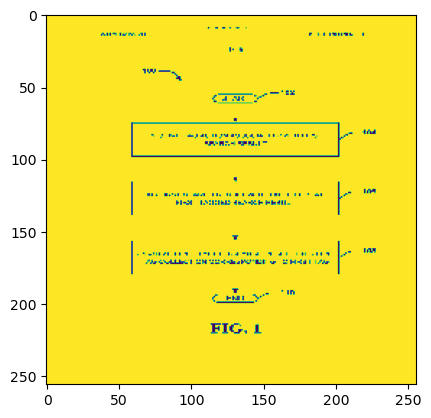

image: CA-2907920-DRAWINGS-20220207-4-expected2.tif
[[2.3777261e-02 7.3994732e-01 1.8916797e-02 2.1451306e-01 2.6781447e-03
  1.6749270e-04]]
Class 2
starting image process


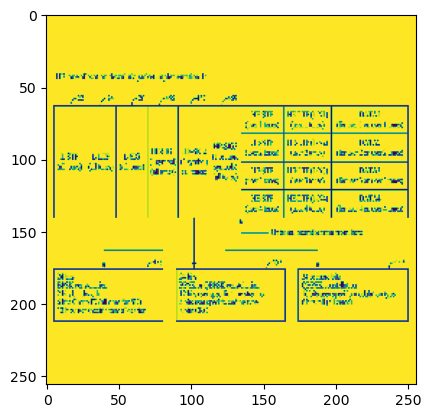

image: CA-2907932-REPRESENTATIVE_DRAWING-20220207-6-expected2.tif
[[7.7325749e-06 4.8088682e-01 5.6743773e-04 5.1068550e-01 5.9426655e-03
  1.9098653e-03]]
Class 6
starting image process


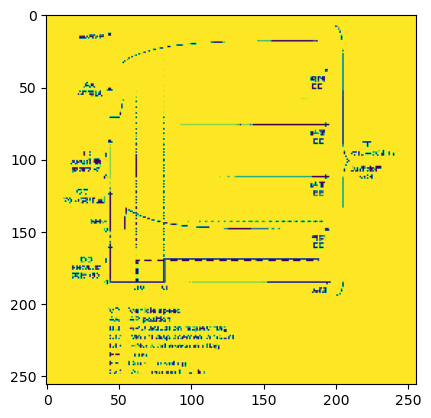

image: CA-2907957-REPRESENTATIVE_DRAWING-20220207-5-expected3.tif
[[2.6784267e-04 2.5515242e-03 9.9398452e-01 2.2722639e-03 4.4200031e-04
  4.8188149e-04]]
Class 3
starting image process


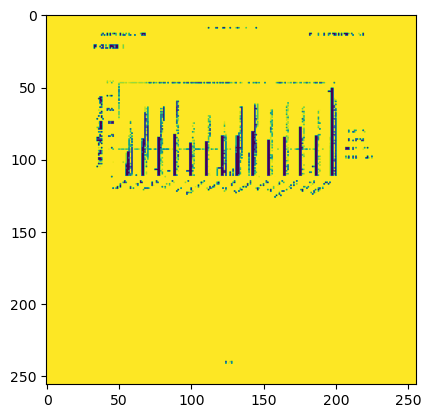

image: CA-2907973-DRAWINGS-20220207-3-expected3.tif
[[4.5373038e-04 2.3954350e-04 9.7596550e-01 2.3309467e-02 9.8350220e-06
  2.1845144e-05]]
Class 3
starting image process


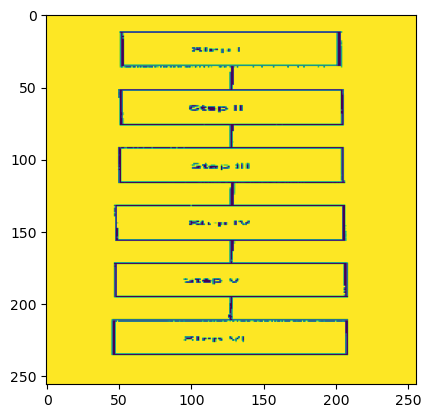

image: CA-2907991-REPRESENTATIVE_DRAWING-20220207-6-expected2.tif
[[1.0651375e-05 9.3199670e-01 5.6244072e-02 1.1524087e-02 1.8999081e-04
  3.4437831e-05]]
Class 2


In [4]:
os.environ['KMP_DUPLICATE_LIB_OK']='True' # temporary fix for duplicate file issue
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized.

# Comparing the Results
for img in os.listdir(TESTDIR):
    print("starting image process")
    try:
        img_array = cv.imread(os.path.join(TESTDIR, img))
        if len(img_array.shape) > 2:
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
        if random.random() > 0:
            kernel = np.array([[0,-1,0], 
                               [-1,5,-1], 
                               [0,-1,0]])
            img_array = cv.filter2D(img_array, -1, kernel)
        img_array = cv.resize(img_array, (IMG_LENGTH, IMG_WIDTH))
        new_array = cv.normalize(img_array, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
        new_shape = new_array.reshape(-1, IMG_LENGTH, IMG_WIDTH, 1)
        predictions = modeltf.predict(new_shape)
        plt.imshow(new_array)
        plt.show()
        print("image: " + img)
        print(predictions)
        print(LABELS[np.argmax(predictions)])
    except Exception as e:
        pass